### 앙상블(Ensemble) : 결정트리 기반 알고리즘 결합하여 구현
[앙상블 종류 요약]

* (1) Voting : 서로 다른 알고리즘 가진 분류기를 결합, 사이킷런은 VotingClassifier 클래스를 제공함 <br>
    <1> 하드보팅(Hard Voting) : 분류기들이 예측한 결과 값을 다수결로 결정 <br>
    <2> 소프트 보팅(Soft Voting) : 각 분류기들이 예측값을 확률로 구하면 이를 평균 내어 확률이 가장 높은 값을 결과 값으로 결정
* (2) Bagging : 같은 유형의 알고리즘을 결합, 데이터 샘플링시 서로 다르게 가져가면서 학습, RandomForest 가 대표적,
     Bootstrapping Aggregation 줄임말<br>
     Bootstrapping : 여러개의 데이터 세트를 중첩되게 분리하는 분할 방식
* (3) Boosting : 여러개의 분류기가 순차적으로 학습하면서 가중치를 부스팅한다, XGBoost(캐글 대회 상위 석권),LightGBM
* (4) Stacking 기법 : 위의 여러개의 개별적 모델을 학습하여 예측한 데이터 세트를 사용하여 최종 메타 모델이 학습 예측

## Bagging 

### 랜덤포레스트(RandomForest)
- 의사 결정 트리 기반(Decision Tree) 기반 분류 알고리즘
- 앙상블(Ensemble), 같은 결정트리를 여러개 사용, 비교적 빠른 수행
- 현재의 랜덤 포레스트의 개념은 레오 브레이먼(Leo Breimen)의 논문에서 만들어짐, 이 논문은 랜덤 노드 최적화(Randomized Node Optimization,RNO)와 배깅(bagging)을 결합한 방법과 같은 CART(Classification And Regression Tree)를 사용해 상관관계가 없는 트리들로 포레스트를 구성하는 방법을 제시했다

In [1]:
'RandomForestClassifier() 하이퍼 파라메터 설명'

# RandomForestClassifier(
#     n_estimators='warn', (결정트리의 갯수, default=10, 많을 수록 좋은 성능을 기대할수 있지만 속도가 느려진다)
#     criterion='gini',
#     max_depth=None,   (트리의 최대 깊이, 결정트리의 파라메터와 동일)
#     min_samples_split=2,(노드를 분할하기 위한 최소한의 샘플 수,default=2,과적합 제어에 사용,결정트리의 파라메터와 동일)
#     min_samples_leaf=1,(leaf 노드가 되기 위한 최소한의 샘플 수,default=1,결정트리의 파라메터와 동일)
#     min_weight_fraction_leaf=0.0,
#     max_features='auto', (최적의 분할을 위해 고려할 최대 피쳐 갯수,결정트리의 파라메터와 동일)
#     max_leaf_nodes=None, (리프노드의 최대 갯수, 결정트리의 파라메터와 동일)
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=None,      (병렬처리 CPU의 갯수, -1이면 전체 CPU 모두 사용)
#     random_state=None,(랜덤 seed 설정 값)
#     verbose=0,
#     warm_start=False,
#     class_weight=None,
# )

'RandomForestClassifier() 하이퍼 파라메터 설명'

In [2]:
# RandomForestClassifier 예제

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

np.random.seed(10)

# mushroom 데이터 셋 읽어오기
# 첫번째 컬럼이 label , 'p': poisonous, 'e':edible
mr = pd.read_csv('mushroom.csv',header=None)
mr.shape  # (8124, 23)
print(mr.iloc[:,0].value_counts()) # 레이블의 분포

# 데이터 내부의 기호를 숫자로 변환하기
label = []  # Y
data = []   # X

for row_index,row in mr.iterrows(): # 8124회 반복
    # row = [p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u]
    label.append(row.iloc[0])  # 문자로 저장
    row_data = []
    
    for v in row.iloc[1:] :
        row_data.append(ord(v)) # 숫자로 변환
    data.append(row_data)   

# print(label)    
# print(data)    
# train(학습)과 test(검증) 데이터로 나누기 : 6093개와 2031개
X_train,X_test,y_train,y_test = train_test_split(data,label) # 75%:25%
len(X_train)  # 6093   75%
len(X_test)   # 2031   25%
len(y_train)  # 6093   75%
len(y_test)   # 2031   25%

# 학습시키기
# 레이블의 클래스 갯수가 2개이므로 Binary Classification
clf = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1) # 결정트리의 갯수=100
clf.fit(X_train,y_train)

# 데이터 예측하기
preds = clf.predict(X_test)
# print(preds)
# print(y_test)

# 정확도 측정
ac_score = metrics.accuracy_score(y_test,preds)
print('정확도:',ac_score) # 1.0 100% 정확도
cl_report = metrics.classification_report(y_test,preds)
print('리포트:\n',cl_report)

e    4208
p    3916
Name: 0, dtype: int64
정확도: 1.0
리포트:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1072
           p       1.00      1.00      1.00       959

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [3]:
print(ord('a'))  # 문자를 아스키 코드 값을 출력
print(chr(97))   # 아스키값에 해당하는 문자를 출력

97
a


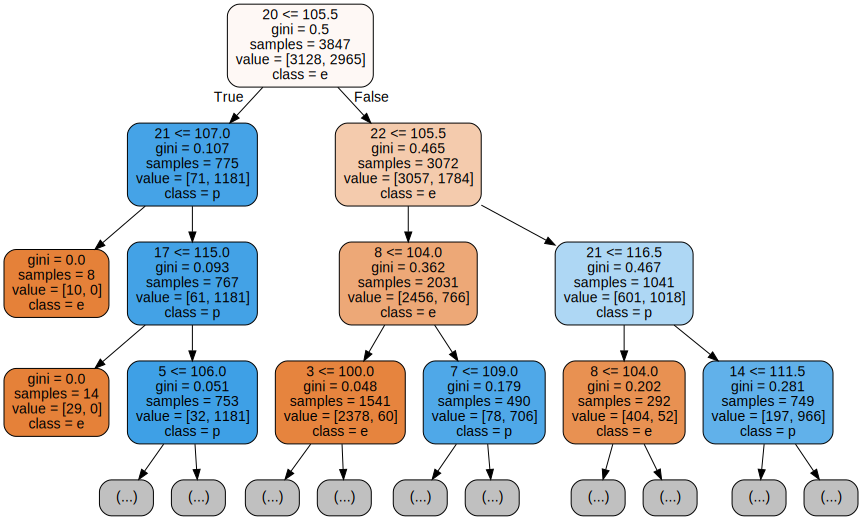

In [4]:
# fit()으로 학습수행시 생성된 tree를 스크립트 텍스트 파일로 저장
from sklearn.tree import export_graphviz

estimator = clf.estimators_[9]  # 100개 트리중에서 10번째 트리

export_graphviz(estimator, out_file ='mushroom.dot', class_names = np.array(['e','p']),
               feature_names=list(mr.columns[1:]),max_depth=3,
                impurity=True, filled=True, rounded=True)

# tree 스크립트 파일을 불러와서 그래프로 출력, 17개 생성 노드가 출력됨
import graphviz

f = open('mushroom.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

### 평가
* 정확도(Accuracy)
* 오차행렬(confusion Matrix)
* 정밀도(Precison)
* 재현율(Recall)
* F1 스코어
* ROC AUC

#### 오차행렬(confusion Matrix)
* True: 맞음, False: 틀림
* Negative : 0 , Positive : 1

#### [ [ TN, FP],    True Negative, False Positive
####  [ FN, TP] ]     False Negative, True Positive

####  정확도 = 맞은갯수/전체갯수 = (TN + TP)/(TN + FP + FN + TP)

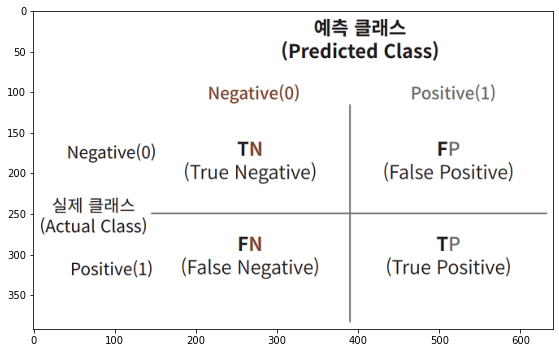

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(6.4*1.5,3.9*1.5))
img = mpimg.imread('오차행렬.bmp')
plt.grid(False)
plt.imshow(img)
plt.show()

#### 정밀도 = TP/(FP + TP), 예측을  Positive로 한 것 중 Positive답을 맞춘 비율, 양성 예측도
#### 재현율 = TP/(FN + TP), 실제 값이 Positive인 것 중 Positive답을 맞춘 비율, 민감도, TPR(True Positive Rate)
#### F1 스코어  = 2/((1/재현율) + (1/정밀도)), feature의 중요도, 정밀도와 재현율을 결합한 지표
#### ROC(Receiver Operation Curve) : 수신자 판단 곡선
* TNR(True Negative Rate,특이성) : TN/(FP + TP)
* x축을 FPR(False Positive Rate) : FP/(FP + TP) = 1 - TNR
* y축을 TPR(True Positive Rate,재현율,민감도) : TP/(FN + TP)

####  ROC AUC(Area Under Curve) : ROC 곡선의 면적, 1에 가까울수록 좋음, 1이 최대

In [6]:
# 정확도 평가
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import classification_report

def get_clf_eval(y_test,preds):
    accuracy = accuracy_score(y_test,preds)
    print('정확도:',accuracy)

    # 오차 행렬
    confusion = confusion_matrix(y_test,preds)
    print('오차행렬:\n',confusion)
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]
    
    # 3개 틀린 예측값의 경우 
    # [[1070    2]
    #  [   1  958]]

    # 정밀도
    precison = precision_score(y_test,preds)
    print('정밀도:',precison)
    print('TP/(FP+TP):',TP/(FP+TP))  #  958/(2+958) : 0.9979166666666667

    # 재현율
    recall = recall_score(y_test,preds)
    print('재현율:',recall)
    print('TP/(FN+TP):',TP/(FN+TP)) # 958/(1+958) : 0.9989572471324296
    
    # F1-스코어(f1_score)
    f1 = f1_score(y_test,preds)
    print('F1-스코어:',f1)
    print(2/((1/recall) + (1/precison)))
#   print(2*recall*precision/(recall+precision))   

    # roc_auc
    roc_auc = roc_auc_score(y_test,preds)
    print('roc_auc:',roc_auc)

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_test_enc = encoder.fit_transform(y_test)
print('label encoding 변환값:',y_test_enc)

preds_enc = encoder.fit_transform(preds)
print('predict encoding 변환값:',preds_enc)

# get_clf_eval(y_test_enc,preds_enc)

print('-'*50)
# 예측 값 몇개를 틀리게 입력해보자
preds_enc[0:3] = 1,0,1
# preds_enc[0:3] = (preds_enc[0:3] - 1)*(-1) # 동일 표현
get_clf_eval(y_test_enc,preds_enc)

label encoding 변환값: [0 1 0 ... 0 1 1]
predict encoding 변환값: [0 1 0 ... 0 1 1]
--------------------------------------------------
정확도: 0.9985228951255539
오차행렬:
 [[1070    2]
 [   1  958]]
정밀도: 0.9979166666666667
TP/(FP+TP): 0.9979166666666667
재현율: 0.9989572471324296
TP/(FN+TP): 0.9989572471324296
F1-스코어: 0.9984366857738406
0.9984366857738406
roc_auc: 0.9985457877453192


 ### Boosting
 여러 개의 약한 학습기(분류기)가 순차적으로 학습,예측 하면서 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선해 나가는 학습 방법<br>
XGBoost(Kaggle 대회 상위 석권), LightGBM(속도 빠름)
* (1) AdaBoost(Adaptive Boosting) : 개별 약한 학습기에 순차적으로 가중치를 부여해 결합하여 예측
* (2) GBM(Gradient Boost Machine) : 에이다 부스트와 유사하나 가중치를 경사하강법(Gradient Descent)을 사용하여 구한다

### XGBoost (eXtra Gradient Boost)
:일반 GBM보다 속도가 빠름, 자체 과적합 규제 기능으로 과적합에 강하다.
<br>
Tree Pruning(나무 가지치기)으로 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임
<br>
Early Stopping(조기 중단) 기능으로 오차가 줄지 않을 경우 실제 estimators 갯수만큼 학습하지 않고 학습을 중단
<br>
원래는 C/C++ 용 라이브러리인데 XGBoost 개발 그룹에서 나중에 파이썬용 사이킷런용 제공

* (1) 파이썬 래퍼 XGBoost : xgboost ( DMatrix 객체 사용, train()/predict() 함수)
* (2) 사이킷런 래퍼 XGBoost : XGBoostClassifier, XGBoostRegressor ( fit()/predict() 함수)

### (1) 파이썬 XGBoost

In [8]:
# xgboost 모듈 설치 : pip install xgboost
# !pip install xgboost
import xgboost as xgb
from xgboost import plot_importance

print(xgb.__version__)

from sklearn.datasets import  load_breast_cancer
from sklearn.model_selection import train_test_split

# Breast Cancer Wisconsin
dataset = load_breast_cancer()
dataset.data.shape    # (569,30)
dataset.target.shape  # (569,)  , 0:악성(malignant),  1:양성(benign) 

x_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=x_features,columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df

1.2.1


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [9]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [10]:
# train : test = 80% :20 %
X_train,X_test,y_train,y_test = train_test_split(x_features,y_label,test_size=0.2, random_state=0)
X_train.shape  # (455, 30)
X_test.shape   # (114, 30)
type(X_train)

numpy.ndarray

In [11]:
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)
type(dtest)

xgboost.core.DMatrix

In [12]:
params = { 'max_depth':3, # 트리의 최대 깊이
            'eta' : 0.1,   # 학습율(--> learning_rate)
            'objective':'binary:logistic',  # 2진 분류
            'eval_metric':'logloss',       # 손실함수
            'early_stoppings' : 100
}

num_round = 400

In [13]:
wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params=params,dtrain=dtrain,num_boost_round=num_round,evals=wlist)

[10:50:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.61167	eval-logloss:0.61369
[1]	train-logloss:0.54435	eval-logloss:0.54543
[2]	train-logloss:0.48615	eval-logloss:0.48902
[3]	train-logloss:0.43809	eval-logloss:0.44035
[4]	train-logloss:0.39412	eval-logloss:0.39958
[5]	train-logloss:0.35626	eval-logloss:0.36435
[6]	train-logloss:0.32515	eval-logloss:0.33274
[7]	train-logloss:0.29562	eval-logloss:0.30601
[8]	train-logloss:0.26978	eval-logloss:0.28281
[9]	train-logloss:0.24725	eval-logloss:0.26186
[10]	train-logloss:0.22772	eval-logloss:0.24381
[11]	train-logloss:0.21015	eval-logloss:0.22700
[12]	train-logloss:0.19444	eval-logloss:0

[162]	train-logloss:0.00789	eval-logloss:0.04858
[163]	train-logloss:0.00787	eval-logloss:0.04862
[164]	train-logloss:0.00784	eval-logloss:0.04875
[165]	train-logloss:0.00780	eval-logloss:0.04841
[166]	train-logloss:0.00778	eval-logloss:0.04845
[167]	train-logloss:0.00776	eval-logloss:0.04840
[168]	train-logloss:0.00774	eval-logloss:0.04825
[169]	train-logloss:0.00772	eval-logloss:0.04827
[170]	train-logloss:0.00770	eval-logloss:0.04831
[171]	train-logloss:0.00768	eval-logloss:0.04815
[172]	train-logloss:0.00767	eval-logloss:0.04827
[173]	train-logloss:0.00762	eval-logloss:0.04839
[174]	train-logloss:0.00760	eval-logloss:0.04823
[175]	train-logloss:0.00759	eval-logloss:0.04830
[176]	train-logloss:0.00756	eval-logloss:0.04843
[177]	train-logloss:0.00754	eval-logloss:0.04845
[178]	train-logloss:0.00749	eval-logloss:0.04862
[179]	train-logloss:0.00748	eval-logloss:0.04846
[180]	train-logloss:0.00746	eval-logloss:0.04851
[181]	train-logloss:0.00745	eval-logloss:0.04847
[182]	train-logloss:

[330]	train-logloss:0.00586	eval-logloss:0.04515
[331]	train-logloss:0.00585	eval-logloss:0.04499
[332]	train-logloss:0.00585	eval-logloss:0.04505
[333]	train-logloss:0.00584	eval-logloss:0.04497
[334]	train-logloss:0.00583	eval-logloss:0.04481
[335]	train-logloss:0.00583	eval-logloss:0.04487
[336]	train-logloss:0.00582	eval-logloss:0.04491
[337]	train-logloss:0.00581	eval-logloss:0.04496
[338]	train-logloss:0.00580	eval-logloss:0.04481
[339]	train-logloss:0.00580	eval-logloss:0.04486
[340]	train-logloss:0.00579	eval-logloss:0.04485
[341]	train-logloss:0.00578	eval-logloss:0.04469
[342]	train-logloss:0.00578	eval-logloss:0.04473
[343]	train-logloss:0.00577	eval-logloss:0.04478
[344]	train-logloss:0.00576	eval-logloss:0.04471
[345]	train-logloss:0.00576	eval-logloss:0.04462
[346]	train-logloss:0.00575	eval-logloss:0.04468
[347]	train-logloss:0.00574	eval-logloss:0.04453
[348]	train-logloss:0.00574	eval-logloss:0.04458
[349]	train-logloss:0.00573	eval-logloss:0.04462
[350]	train-logloss:

In [14]:
# XGBoost 의 predict()함수 사용 예측
pred_probs = xgb_model.predict(dtest)
# np.round(pred_probs)  # 소수점을 모두 반올림

preds = [1 if x > 0.5 else 0 for x in pred_probs]
preds[:10]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [15]:
# 정확도 평가
get_clf_eval(y_test,preds)

정확도: 0.9912280701754386
오차행렬:
 [[46  1]
 [ 0 67]]
정밀도: 0.9852941176470589
TP/(FP+TP): 0.9852941176470589
재현율: 1.0
TP/(FN+TP): 1.0
F1-스코어: 0.9925925925925926
0.9925925925925925
roc_auc: 0.9893617021276595


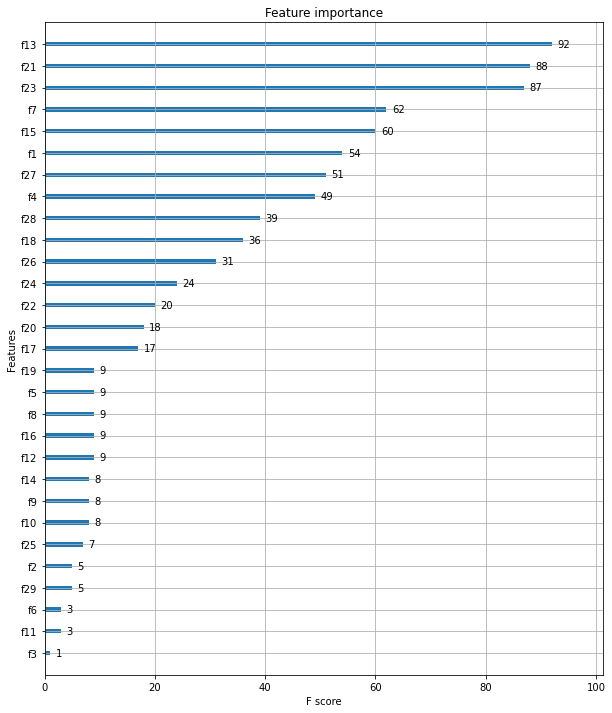

In [16]:
# plot_importance() :피쳐의 중요도를 그래프로 출력
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig,ax =plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

### (2) 사이킷런 Wrapper XGBoost 개요 및 적용
* XGBoostClassifier
* XGBoostRegressor

In [17]:
' XGBoostClassifier 의 하이퍼 파라메터 설명 '

# XGBoostClassifier(
#     max_depth=3,          (트리의 최대 깊이, 결정 트리의 파라메터와 동일) 
#     learning_rate=0.1,    (학습율, default = 0.1, 0과 1사이의 값으로 설정, 보통 0.01~0.2 사이, 파이썬 래퍼에서는 eta)
#     n_estimators=100,     (결정 트리의 갯수 ,default = 100) 
#     verbosity=1,          (출력 메세지 조정, 0이면 silent 와 동일 , 3 은 debug)
#     silent=None,          (1로 설정하면 출력 메시지를 보여주지 않는다)
#     objective='binary:logistic', (비용함수가 이진 분류용 임을 선택함, 다중 분류용일 때는 'multi:softmax')
#     booster='gbtree',     ('gbtree'와 'gblinaer'를 선택)
#     n_jobs=1,             (병렬 CPU의 갯수, -1이면 전체 모든 CPU를 사용)
#     nthread=None,         (CPU의 쓰레드 개수 조정)
#     gamma=0,           (min_split_loss 값,리프노드를 추가적으로 나눌지를 결정할 최소 오차 감소 값, 클수록 과적합 감소효과)
#     min_child_weight=1,   (GBM의 min_child_leaf와 유사, 과적합 조절에 사용)
#     max_delta_step=0,     (class가 심하게 비대칭일 때를 제외하고 일반적으로 사용하지 않음 )
#     subsample=1, (트리가 커져서 과적합 되는것을 제어하기 위해 데이터를 샘플링 하는 비율, 0.5이면 전체 데이터의 절반을 사용,1:모두사용)
#     colsample_bytree=1,  (트리 생성에 필요한 컬럼(피처)을 임의로 샘플링하는 비율,피처가 너무 많을 경우 과적합 조정에 사용 )
#     colsample_bylevel=1, (트리 깊이 레벨 마다 샘플링하는 비율)
#     colsample_bynode=1,  (각 노드 분리(split)할 때 마다 샘플링하는 비율)
#     reg_alpha=0,         (L1 regularization 적용 값 , 과적합 감소 효과)
#     reg_lambda=1,        (L2 regularization 적용 값 , 과적합 감소 효과)
#     scale_pos_weight=1, (비대칭 클래스로 구성된 데이터셋의 균형 조정)
#     base_score=0.5,     (bias 초기 값)
#     random_state=0,   (Random number seed)
#     seed=None,        (Random number seed, 없어짐)
#     missing=None,     ( 결측치 값 ,default = None 일 경우 np.nan 으로 결측치를 자체 처리함)
#     **kwargs,
# )

# https://xgboost.readthedocs.io/en/latest/parameter.html

' XGBoostClassifier 의 하이퍼 파라메터 설명 '

In [18]:
' XGBoostClassifier 클래스의 fit함수의 파라 메터 설명 '
# xgb_wrapper.fit(
#     X,     ( feature,피쳐)
#     y,     (label, y 값)
#     sample_weight=None,
#     eval_set=None,  (Test 데이터 셋, 리스트 형태로 입력)
#     eval_metric=None, (검증에 사용되는 함수의 정의, 'rmse':회귀,'logloss':분류,'error':2진 분류)
#     early_stopping_rounds=None, ( 조기 중단 반복 횟수)
#     verbose=True, (메세지 출력)
#     xgb_model=None,
#     sample_weight_eval_set=None, (검증 데이터 셋의 가중치 리스트)
#     callbacks=None,
# )

' XGBoostClassifier 클래스의 fit함수의 파라 메터 설명 '

#### 과적합 해결을 위한 파라메터 튜닝 시 고려해 볼만한 사항
* learning_rate 값을 낮추고 반대로 n_estimators는 높여준다
* max_depth 값을 낯춘다
* min_child_weight 값을 높인다
* gamma 값을 높인다
* subsample 비율 값을 줄여본다
* colsample_bytree 비율 값을 줄여본다

In [19]:
# 사이킷런의 래퍼 : XGBoostClassifier 
#  early_stopping_rounds=400 : 조기 중단 반복 값
from xgboost import XGBClassifier

evals = [(X_test,y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=400,eval_set=evals,
               eval_metric='logloss', verbose=True)
w_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61369
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.54543
[2]	validation_0-logloss:0.48902
[3]	validation_0-logloss:0.44035
[4]	validation_0-logloss:0.39958
[5]	validation_0-logloss:0.36435
[6]	validation_0-logloss:0.33274
[7]	validation_0-logloss:0.30601
[8]	validation_0-logloss:0.28281
[9]	validation_0-logloss:0.26186
[10]	validation_0-logloss:0.24381
[11]	validation_0-logloss:0.22700
[12]	validation_0-logloss:0.21309
[13]	validation_0-logloss:0.20019
[14]	validation_0-logloss:0.18700
[15]	validation_0-logloss:0.17661
[16]	validation_0-logloss:0.16734
[17]	validation_0-logloss:0.15739
[18]	validation_0-logloss:0.15021
[19]	validation_0-logloss:0.14276
[20]	validation_0-logloss:0.13605
[21]	validation_0-logloss:0.13016
[22]	validation_0-logloss:0.12378
[23]	validation_0-logloss:0.11809
[24]	validation_0-logloss:0.11480
[25]	validation_0-logloss:0.11137
[26]	validation_0-logloss:0.10701
[27]	validation_0-loglo

[236]	validation_0-logloss:0.04784
[237]	validation_0-logloss:0.04790
[238]	validation_0-logloss:0.04781
[239]	validation_0-logloss:0.04791
[240]	validation_0-logloss:0.04770
[241]	validation_0-logloss:0.04773
[242]	validation_0-logloss:0.04780
[243]	validation_0-logloss:0.04769
[244]	validation_0-logloss:0.04756
[245]	validation_0-logloss:0.04751
[246]	validation_0-logloss:0.04756
[247]	validation_0-logloss:0.04736
[248]	validation_0-logloss:0.04739
[249]	validation_0-logloss:0.04745
[250]	validation_0-logloss:0.04749
[251]	validation_0-logloss:0.04754
[252]	validation_0-logloss:0.04736
[253]	validation_0-logloss:0.04726
[254]	validation_0-logloss:0.04730
[255]	validation_0-logloss:0.04710
[256]	validation_0-logloss:0.04716
[257]	validation_0-logloss:0.04720
[258]	validation_0-logloss:0.04711
[259]	validation_0-logloss:0.04714
[260]	validation_0-logloss:0.04694
[261]	validation_0-logloss:0.04700
[262]	validation_0-logloss:0.04690
[263]	validation_0-logloss:0.04695
[264]	validation_0-l

In [20]:
get_clf_eval(y_test,w_preds)

정확도: 0.9912280701754386
오차행렬:
 [[46  1]
 [ 0 67]]
정밀도: 0.9852941176470589
TP/(FP+TP): 0.9852941176470589
재현율: 1.0
TP/(FN+TP): 1.0
F1-스코어: 0.9925925925925926
0.9925925925925925
roc_auc: 0.9893617021276595


In [21]:
# 사이킷런의 래퍼 : XGBoostClassifier 
#  early_stopping_rounds=10 : 조기 중단 반복 값
from xgboost import XGBClassifier

evals = [(X_test,y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=10,eval_set=evals,
               eval_metric='logloss', verbose=True)
w_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61369
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.54543
[2]	validation_0-logloss:0.48902
[3]	validation_0-logloss:0.44035
[4]	validation_0-logloss:0.39958
[5]	validation_0-logloss:0.36435
[6]	validation_0-logloss:0.33274
[7]	validation_0-logloss:0.30601
[8]	validation_0-logloss:0.28281
[9]	validation_0-logloss:0.26186
[10]	validation_0-logloss:0.24381
[11]	validation_0-logloss:0.22700
[12]	validation_0-logloss:0.21309
[13]	validation_0-logloss:0.20019
[14]	validation_0-logloss:0.18700
[15]	validation_0-logloss:0.17661
[16]	validation_0-logloss:0.16734
[17]	validation_0-logloss:0.15739
[18]	validation_0-logloss:0.15021
[19]	validation_0-logloss:0.14276
[20]	validation_0-logloss:0.13605
[21]	validation_0-logloss:0.13016
[22]	validation_0-logloss:0.12378
[23]	validation_0-logloss:0.11809
[24]	validation_0-logloss:0.11480
[25]	validation_0-logloss:0.11137
[26]	validation_0-logloss:0.10701
[27]	validation_0-loglos

In [22]:
get_clf_eval(y_test,w_preds)  # 
# early_stopping_rounds=400  --> roc_auc: 0.9893617021276595
# early_stopping_rounds=10   --> roc_auc: 0.971260717688155

정확도: 0.9736842105263158
오차행렬:
 [[45  2]
 [ 1 66]]
정밀도: 0.9705882352941176
TP/(FP+TP): 0.9705882352941176
재현율: 0.9850746268656716
TP/(FN+TP): 0.9850746268656716
F1-스코어: 0.9777777777777777
0.9777777777777777
roc_auc: 0.971260717688155


### LightGBM
Microsoft 사 제공 <br>
부스팅, XGBoost보다 속도가 빠르다, 메모리 사용량이 적다, 사이킷런 래퍼 제공 <br>
적은 데이터 세트에서 과적합이 발생할수 있다, 10000 이상의 데이터세트에 적당

In [23]:
' LGBMClassifier 클래스의 파라 메터 설명 '
# LGBMClassifier(
#     boosting_type='gbdt', (부스팅 타입 설정, 'gbdt': Gradient Boosting Decision Tree, 'rf', Random Forest)
#     num_leaves=31,   (하나의 트리가 가질수 있는 최대 리프 노드 갯수 )
#     max_depth=-1,    (트리의 최대 깊이 )
#     learning_rate=0.1,   (학습율)
#     n_estimators=100,    (결정 트리의 갯수)
#     subsample_for_bin=200000, ( Number of samples for constructing bins )
#     objective=None,      (손실(비용) 함수)
#     class_weight=None,
#     min_split_gain=0.0,
#     min_child_weight=0.001, (GBM의 min_child_leaf와 유사, 과적합 조절에 사용)
#     min_child_samples=20,
#     subsample=1.0,
#     subsample_freq=0,
#     colsample_bytree=1.0,
#     reg_alpha=0.0,      (L1 regularization 적용 값 , 과적합 감소 효과)
#     reg_lambda=0.0,     (L2 regularization 적용 값 , 과적합 감소 효과)
#     random_state=None,  (Random number seed)
#     n_jobs=-1,           (병렬 CPU의 갯수, -1이면 전체 모든 CPU를 사용)
#     silent=True,         (True 로 설정하면 출력 메시지를 보여주지 않는다)
#     importance_type='split',
#     **kwargs,
# )

' LGBMClassifier 클래스의 파라 메터 설명 '

In [24]:
' LGBMClassifier 클래스의 fit함수의 파라 메터 설명 '
# lgbm_wrapper.fit(
#     X,     ( feature )
#     y,     ( label )
#     sample_weight=None,   ( 학습 데이터의 가중치 )
#     init_score=None,
#     eval_set=None,   (Test 데이터 셋, 리스트 형태로 입력)
#     eval_names=None,
#     eval_sample_weight=None,
#     eval_class_weight=None,
#     eval_init_score=None,
#     eval_metric=None, (검증에 사용되는 함수의 정의, 'rmse':회귀,'logloss':분류,'error':2진 분류)
#     early_stopping_rounds=None, ( 조기 중단 반복 횟수)
#     verbose=True,          (메세지 출력)
#     feature_name='auto',
#     categorical_feature='auto',
#     callbacks=None
# )    

' LGBMClassifier 클래스의 fit함수의 파라 메터 설명 '

In [25]:
# ! pip install lightgbm
import lightgbm
lightgbm.__version__

'3.0.0'

In [26]:
from lightgbm import LGBMClassifier

# 데이터 가져오기, split하기 : 앞부분에 구현되어 있음

evals = [(X_test,y_test)]

lgbm_wrapper = LGBMClassifier(n_estimators=400)
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,
                eval_metric='logloss', eval_set=evals,verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.602575
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.536123
[3]	valid_0's binary_logloss: 0.482224
[4]	valid_0's binary_logloss: 0.439121
[5]	valid_0's binary_logloss: 0.399484
[6]	valid_0's binary_logloss: 0.360741
[7]	valid_0's binary_logloss: 0.329635
[8]	valid_0's binary_logloss: 0.300259
[9]	valid_0's binary_logloss: 0.279599
[10]	valid_0's binary_logloss: 0.259173
[11]	valid_0's binary_logloss: 0.239127
[12]	valid_0's binary_logloss: 0.222309
[13]	valid_0's binary_logloss: 0.209351
[14]	valid_0's binary_logloss: 0.194316
[15]	valid_0's binary_logloss: 0.185282
[16]	valid_0's binary_logloss: 0.173675
[17]	valid_0's binary_logloss: 0.165308
[18]	valid_0's binary_logloss: 0.155769
[19]	valid_0's binary_logloss: 0.14865
[20]	valid_0's binary_logloss: 0.140995
[21]	valid_0's binary_logloss: 0.134334
[22]	valid_0's binary_logloss: 0.126574
[23]	valid_0's binary_logloss: 0.119264
[24]	valid_0's binary_loglos

In [27]:
get_clf_eval(y_test,preds) # roc_auc: 0.971260717688155
# XGBoost 보다 lighGBM의 정확도가 다소 떨어짐 98.9% --> 97.1%
# 원인 : 데이터셋이 지나치게 적음(560개), 1만개 이상 필요

정확도: 0.9649122807017544
오차행렬:
 [[44  3]
 [ 1 66]]
정밀도: 0.9565217391304348
TP/(FP+TP): 0.9565217391304348
재현율: 0.9850746268656716
TP/(FN+TP): 0.9850746268656716
F1-스코어: 0.9705882352941176
0.9705882352941176
roc_auc: 0.9606224198158145


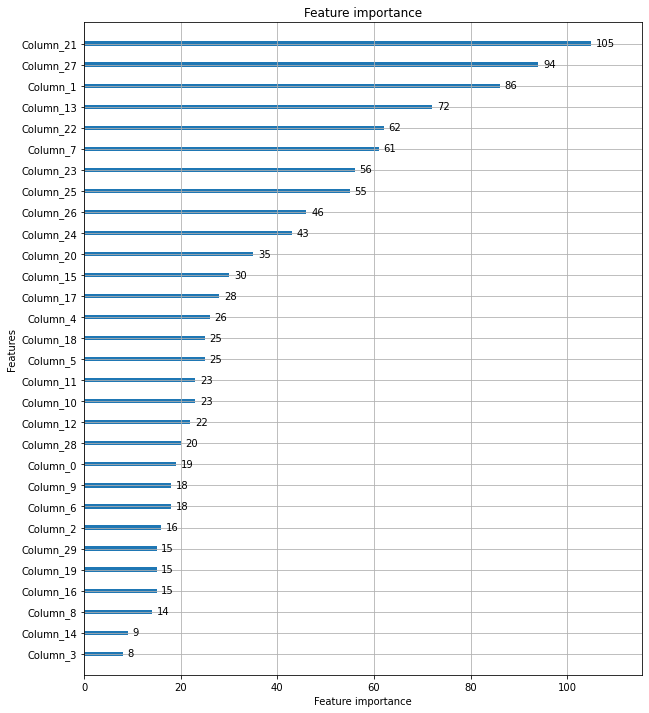

In [28]:
# plot_importance()  : 피처의 중요도를 그래프로 출력
import matplotlib.pyplot as plt
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)